In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D,GlobalAveragePooling2D, multiply, Permute, Multiply
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from keras import backend as K
import math

In [2]:
from tcn import TCN

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot

from tensorflow.keras.utils import to_categorical
import tensorflow.keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D, Bidirectional, ConvLSTM1D
from tensorflow.keras.layers import Input, TimeDistributed, Conv1D, MaxPooling1D, BatchNormalization, GlobalAveragePooling1D, Activation
from tensorflow.python.keras.utils import np_utils
from sklearn.metrics import precision_score, recall_score, f1_score
from typing import Any, Dict, List, Tuple
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
tdf = pd.read_csv('E:/dataset/HAR/Daphnet/PreFoG/PI1/features/freq_1.csv')
tdf

,FIA_F,FIA_V,FIA_L,FIL_F,FIL_V,FIL_L,FIT_F,FIT_V,FIT_L,PA_F,...,ENt_T_L,peak_A_F,peak_A_V,peak_A_L,peak_L_F,peak_L_V,peak_L_L,peak_T_F,peak_T_V,peak_T_L
0,0.255604,0.201880,0.268956,0.215104,0.202261,0.350273,4.642603,0.198401,0.221112,2.419689e+04,...,3.082679,7.196150,9.220339,9.145974,9.834276,8.158670,15.928711,7.621073,15.156961,16.525831
1,0.221468,0.202177,0.206564,0.209339,0.198753,0.330445,0.771721,0.196140,0.259787,2.197548e+04,...,2.905290,10.513121,17.439662,11.379937,11.470662,20.662897,14.584389,7.844919,20.574660,18.132972
2,0.366882,0.197780,0.221398,0.905006,0.196448,0.541888,4.203141,0.199720,0.269303,2.692547e+04,...,3.144076,53.969047,12.429694,37.426407,308.040243,23.373333,77.596637,153.358605,33.069285,15.167472
3,0.236479,0.195585,0.190686,0.245126,0.196283,0.207387,1.918471,0.201184,0.264178,3.892167e+04,...,2.955390,176.457486,30.691349,176.293967,51.292049,10.265587,314.969608,25.099172,18.476397,27.125909
4,0.200074,0.199114,0.281368,0.388780,0.195081,0.722202,0.377567,0.205098,0.222422,1.008114e+05,...,1.468792,72.237879,16.581422,238.576756,60.824446,21.111375,442.879877,78.761257,29.209993,481.336613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17242,1.415763,0.339035,1.102846,1.784223,0.201830,0.889792,0.207931,0.251857,1.299440,1.119138e+07,...,2.810246,45386.131634,17095.811561,16040.039859,14336.587712,1797.349751,11015.804045,3087.786244,1592.027908,845.699288
17243,3.842503,0.478943,3.130317,1.800563,0.138389,1.697710,1.136340,0.219919,2.217932,1.076938e+07,...,3.043247,48918.296565,11482.090689,5489.673893,14066.072241,1459.886970,17184.582782,2437.747875,1536.685531,463.428131
17244,8.706340,0.825687,14.584485,2.404151,0.291611,1.465685,1.399177,0.304837,1.410650,5.139957e+06,...,2.880352,93786.136259,37020.259829,20864.962413,33257.429100,1463.483375,18930.165747,3090.037941,1432.703123,597.551492
17245,9.477554,2.104247,7.352573,4.585981,0.276006,2.614604,2.867446,0.204642,1.791834,6.497664e+06,...,3.107158,99281.238366,81449.772228,22377.107978,58964.213434,2399.599815,19639.529900,1878.016409,2544.788997,638.763840


In [6]:
fdf = pd.read_csv('E:/dataset/HAR/Daphnet/PreFoG/PI1/features/time_1.csv')
fdf

,0,mean_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,mean_A_V,var_A_V,std_A_V,rms_A_V,...,mean_T_V,var_T_V,std_T_V,rms_T_V,mav_T_V,mean_T_L,var_T_L,std_T_L,rms_T_L,mav_T_L
0,0,-76.265625,80.445068,8.969117,76.791215,76.265625,1031.953125,95.044678,9.749086,1031.999175,...,1015.500000,84.500000,9.192388,1015.541604,1015.500000,-75.828125,110.579834,10.515695,76.553801,75.828125
1,0,-72.515625,66.499756,8.154738,72.972705,72.515625,1033.343750,104.288086,10.212154,1033.394210,...,1012.625000,85.171875,9.228861,1012.667054,1012.625000,-79.406250,121.459961,11.020887,80.167403,79.406250
2,0,-70.859375,391.527100,19.787044,73.570226,70.859375,1033.359375,105.073975,10.250560,1033.410215,...,1013.968750,148.217773,12.174472,1014.041835,1013.968750,-78.750000,170.500000,13.057565,79.825200,78.750000
3,0,-120.234375,462.679443,21.509985,122.143294,120.234375,1026.093750,154.741211,12.439502,1026.169150,...,1013.734375,102.570068,10.127688,1013.784964,1013.734375,-68.000000,182.500000,13.509256,69.328926,68.000000
4,0,-171.031250,239.405273,15.472727,171.729711,171.031250,1014.781250,140.483398,11.852569,1014.850466,...,1017.734375,130.101318,11.406196,1017.798290,1017.734375,-50.609375,675.331787,25.987147,56.891481,50.890625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17242,1,242.250000,327142.093750,571.963367,621.149866,367.156250,1069.515625,85487.031006,292.381653,1108.760886,...,995.187500,13073.402344,114.338980,1001.734277,995.187500,115.312500,4171.496094,64.587120,132.168335,117.718750
17243,1,334.640625,300198.136475,547.903401,642.014396,431.171875,947.906250,91705.866211,302.829764,995.104077,...,1001.328125,7914.001709,88.960675,1005.272110,1001.328125,94.687500,3749.964844,61.236957,112.763857,96.750000
17244,1,373.515625,650379.812256,806.461290,888.759661,558.359375,962.968750,174659.374023,417.922689,1049.746725,...,993.843750,7477.413086,86.472036,997.598523,993.843750,91.750000,3386.000000,58.189346,108.646502,96.500000
17245,1,402.265625,902242.913818,949.864682,1031.533105,621.828125,979.484375,312390.906006,558.919409,1127.732480,...,997.781250,7689.389648,87.689165,1001.627083,997.781250,112.687500,5700.277344,75.500181,135.641992,112.968750


In [7]:
tdf.columns

Index(['FIA_F', 'FIA_V', 'FIA_L', 'FIL_F', 'FIL_V', 'FIL_L', 'FIT_F', 'FIT_V',
       'FIT_L', 'PA_F', 'PA_V', 'PA_L', 'PL_F', 'PL_V', 'PL_L', 'PT_F', 'PT_V',
       'PT_L', 'EN_A_F', 'EN_A_V', 'EN_A_L', 'EN_L_F', 'EN_L_V', 'EN_L_L',
       'EN_T_F', 'EN_T_V', 'EN_T_L', 'ENt_A_F', 'ENt_A_V', 'ENt_A_L',
       'ENt_L_F', 'ENt_L_V', 'ENt_L_L', 'ENt_T_F', 'ENt_T_V', 'ENt_T_L',
       'peak_A_F', 'peak_A_V', 'peak_A_L', 'peak_L_F', 'peak_L_V', 'peak_L_L',
       'peak_T_F', 'peak_T_V', 'peak_T_L'],
      dtype='object')

In [8]:
#tdf.drop('name', axis=1, inplace=True)

In [9]:
fdf.columns

Index(['0', 'mean_A_F', 'var_A_F', 'std_A_F', 'rms_A_F', 'mav_A_F', 'mean_A_V',
       'var_A_V', 'std_A_V', 'rms_A_V', 'mav_A_V', 'mean_A_L', 'var_A_L',
       'std_A_L', 'rms_A_L', 'mav_A_L', 'mean_L_F', 'var_L_F', 'std_L_F',
       'rms_L_F', 'mav_L_F', 'mean_L_V', 'var_L_V', 'std_L_V', 'rms_L_V',
       'mav_L_V', 'mean_L_L', 'var_L_L', 'std_L_L', 'rms_L_L', 'mav_L_L',
       'mean_T_F', 'var_T_F', 'std_T_F', 'rms_T_F', 'mav_T_F', 'mean_T_V',
       'var_T_V', 'std_T_V', 'rms_T_V', 'mav_T_V', 'mean_T_L', 'var_T_L',
       'std_T_L', 'rms_T_L', 'mav_T_L'],
      dtype='object')

In [10]:
df = pd.concat([tdf,fdf],axis = 1)

In [11]:
#print(df['name'].value_counts())

In [12]:
df.rename(columns={'0': 'Action'}, inplace=True)
df.columns

Index(['FIA_F', 'FIA_V', 'FIA_L', 'FIL_F', 'FIL_V', 'FIL_L', 'FIT_F', 'FIT_V',
       'FIT_L', 'PA_F', 'PA_V', 'PA_L', 'PL_F', 'PL_V', 'PL_L', 'PT_F', 'PT_V',
       'PT_L', 'EN_A_F', 'EN_A_V', 'EN_A_L', 'EN_L_F', 'EN_L_V', 'EN_L_L',
       'EN_T_F', 'EN_T_V', 'EN_T_L', 'ENt_A_F', 'ENt_A_V', 'ENt_A_L',
       'ENt_L_F', 'ENt_L_V', 'ENt_L_L', 'ENt_T_F', 'ENt_T_V', 'ENt_T_L',
       'peak_A_F', 'peak_A_V', 'peak_A_L', 'peak_L_F', 'peak_L_V', 'peak_L_L',
       'peak_T_F', 'peak_T_V', 'peak_T_L', 'Action', 'mean_A_F', 'var_A_F',
       'std_A_F', 'rms_A_F', 'mav_A_F', 'mean_A_V', 'var_A_V', 'std_A_V',
       'rms_A_V', 'mav_A_V', 'mean_A_L', 'var_A_L', 'std_A_L', 'rms_A_L',
       'mav_A_L', 'mean_L_F', 'var_L_F', 'std_L_F', 'rms_L_F', 'mav_L_F',
       'mean_L_V', 'var_L_V', 'std_L_V', 'rms_L_V', 'mav_L_V', 'mean_L_L',
       'var_L_L', 'std_L_L', 'rms_L_L', 'mav_L_L', 'mean_T_F', 'var_T_F',
       'std_T_F', 'rms_T_F', 'mav_T_F', 'mean_T_V', 'var_T_V', 'std_T_V',
       'rms_T_V', 'mav_

In [13]:
print(df['Action'].value_counts())

Action
0    15630
1     1617
Name: count, dtype: int64


In [14]:
import pandas as pd
import numpy as np


# 'Action' 칼럼을 제외한 모든 칼럼에서 0이거나 NaN이 포함된 행을 삭제
columns_to_check = df.columns.difference(['Action'])
df_filtered = df[~(df[columns_to_check] == 0).any(axis=1) & ~(df[columns_to_check].isnull()).any(axis=1)]

df_filtered

,FIA_F,FIA_V,FIA_L,FIL_F,FIL_V,FIL_L,FIT_F,FIT_V,FIT_L,PA_F,...,mean_T_V,var_T_V,std_T_V,rms_T_V,mav_T_V,mean_T_L,var_T_L,std_T_L,rms_T_L,mav_T_L
0,0.255604,0.201880,0.268956,0.215104,0.202261,0.350273,4.642603,0.198401,0.221112,2.419689e+04,...,1015.500000,84.500000,9.192388,1015.541604,1015.500000,-75.828125,110.579834,10.515695,76.553801,75.828125
1,0.221468,0.202177,0.206564,0.209339,0.198753,0.330445,0.771721,0.196140,0.259787,2.197548e+04,...,1012.625000,85.171875,9.228861,1012.667054,1012.625000,-79.406250,121.459961,11.020887,80.167403,79.406250
2,0.366882,0.197780,0.221398,0.905006,0.196448,0.541888,4.203141,0.199720,0.269303,2.692547e+04,...,1013.968750,148.217773,12.174472,1014.041835,1013.968750,-78.750000,170.500000,13.057565,79.825200,78.750000
3,0.236479,0.195585,0.190686,0.245126,0.196283,0.207387,1.918471,0.201184,0.264178,3.892167e+04,...,1013.734375,102.570068,10.127688,1013.784964,1013.734375,-68.000000,182.500000,13.509256,69.328926,68.000000
4,0.200074,0.199114,0.281368,0.388780,0.195081,0.722202,0.377567,0.205098,0.222422,1.008114e+05,...,1017.734375,130.101318,11.406196,1017.798290,1017.734375,-50.609375,675.331787,25.987147,56.891481,50.890625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17242,1.415763,0.339035,1.102846,1.784223,0.201830,0.889792,0.207931,0.251857,1.299440,1.119138e+07,...,995.187500,13073.402344,114.338980,1001.734277,995.187500,115.312500,4171.496094,64.587120,132.168335,117.718750
17243,3.842503,0.478943,3.130317,1.800563,0.138389,1.697710,1.136340,0.219919,2.217932,1.076938e+07,...,1001.328125,7914.001709,88.960675,1005.272110,1001.328125,94.687500,3749.964844,61.236957,112.763857,96.750000
17244,8.706340,0.825687,14.584485,2.404151,0.291611,1.465685,1.399177,0.304837,1.410650,5.139957e+06,...,993.843750,7477.413086,86.472036,997.598523,993.843750,91.750000,3386.000000,58.189346,108.646502,96.500000
17245,9.477554,2.104247,7.352573,4.585981,0.276006,2.614604,2.867446,0.204642,1.791834,6.497664e+06,...,997.781250,7689.389648,87.689165,1001.627083,997.781250,112.687500,5700.277344,75.500181,135.641992,112.968750


In [15]:
df['Action'].value_counts()

Action
0    15630
1     1617
Name: count, dtype: int64

In [16]:
df = df[df['Action'] != 2]

In [17]:
df['Action'].value_counts()

Action
0    15630
1     1617
Name: count, dtype: int64

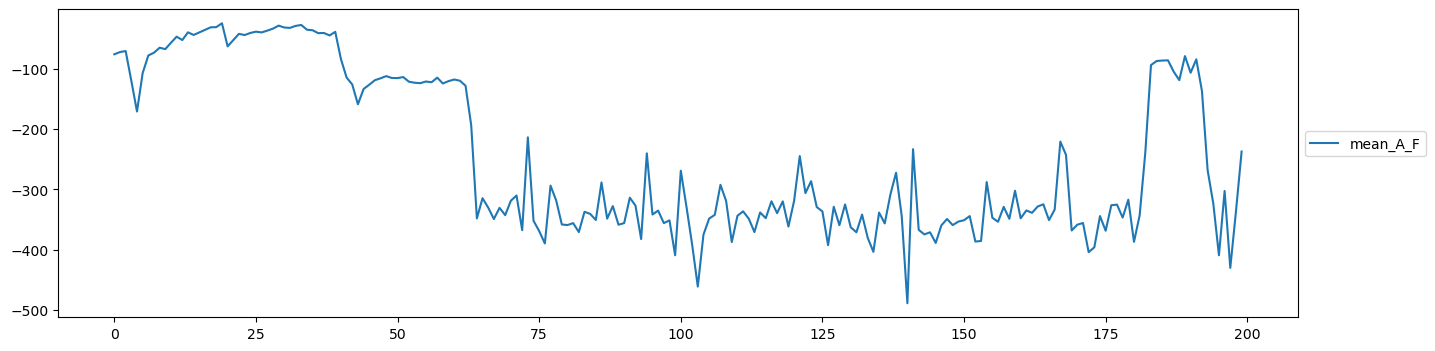

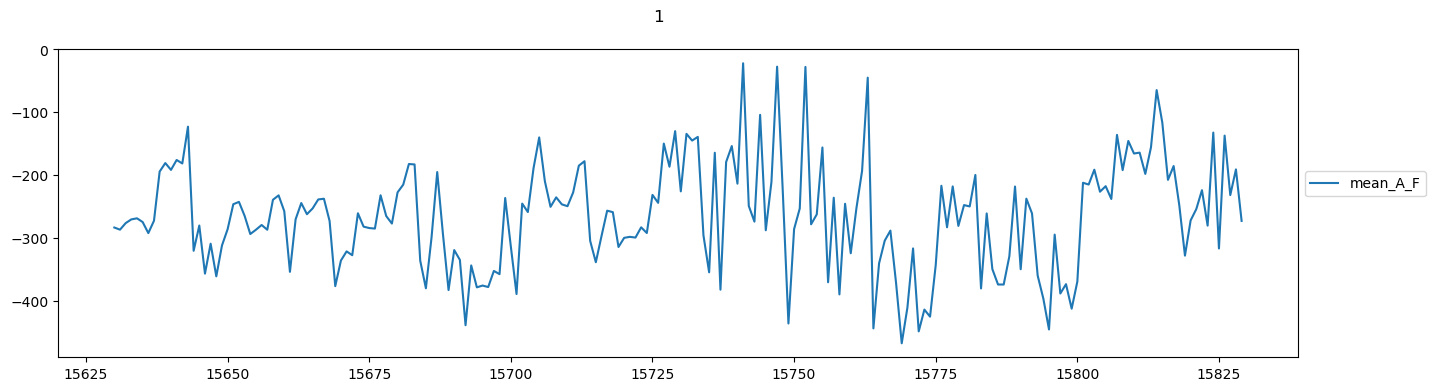

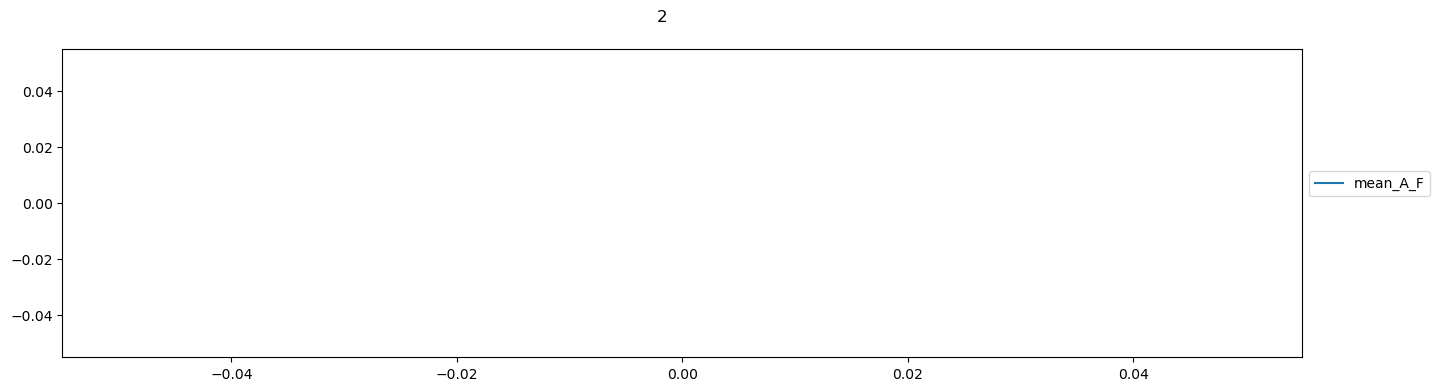

In [18]:
def plot_activity(status, df):
    data = df[df["Action"] == status][["mean_A_F"]][:200]
    axis = data.plot(subplots = True, figsize = (16, 4), title = status)
    for ax in axis:
        ax.legend(loc = "lower left", bbox_to_anchor = (1.0, 0.5))
        
plot_activity(0, df)
plot_activity(1, df)
plot_activity(2, df)

In [19]:
#df.to_csv('D:/HAR/Daphnet/target_sample.csv', index=False)

In [20]:
# PreFoG를 normal에 저장
#df.loc[df['status'] == 2, 'status'] = 0

# PreFoG를 FoG에 저장
df.loc[df['Action'] == 2, 'Action'] = 1

In [21]:
df['Action'].value_counts()

Action
0    15630
1     1617
Name: count, dtype: int64

In [22]:
NUM = 0

count_0 = (df['Action'] == 0).sum()
count_1 = (df['Action'] == 1).sum()

NUM = min(count_1, count_0)
NUM

1617

In [23]:
Normal = df[df['Action'] == 1].head(NUM).copy()
FoG = df[df['Action'] == 0].head(NUM).copy()

In [24]:
data = pd.DataFrame()
data = pd.concat([Normal, FoG])

In [25]:
df = data.copy()

In [26]:
df['Action'].value_counts()

Action
1    1617
0    1617
Name: count, dtype: int64

In [27]:
df

,FIA_F,FIA_V,FIA_L,FIL_F,FIL_V,FIL_L,FIT_F,FIT_V,FIT_L,PA_F,...,mean_T_V,var_T_V,std_T_V,rms_T_V,mav_T_V,mean_T_L,var_T_L,std_T_L,rms_T_L,mav_T_L
15630,2.998305,1.343343,1.970256,1.295354,0.403450,5.196786,1.596717,0.562381,3.722886,1.381417e+07,...,1025.421875,47970.493896,219.021674,1048.551628,1025.421875,109.609375,21488.425537,146.589309,183.037266,158.578125
15631,1.022114,0.625777,0.908254,0.971493,0.477921,0.250312,1.064314,0.409705,1.850218,1.204341e+07,...,988.375000,29664.109375,172.232719,1003.269281,988.375000,136.125000,28641.265625,169.237306,217.189505,177.593750
15632,3.844960,0.823117,3.038943,5.663399,0.887005,18.336227,3.085552,0.977260,1.858981,1.543930e+06,...,1024.031250,73886.686523,271.821056,1059.493600,1024.031250,5.390625,22899.519287,151.325871,151.421855,117.203125
15633,3.596953,0.790984,4.605371,5.519694,0.677903,13.501094,6.628603,1.744571,6.104813,1.541579e+06,...,1031.984375,178930.234131,423.001459,1115.312505,1031.984375,23.562500,33986.996094,184.355624,185.855286,136.343750
15634,3.589106,0.578707,1.270787,8.597176,0.209852,18.813045,15.788128,0.411418,24.901963,1.601805e+06,...,998.390625,58966.175537,242.829519,1027.496966,998.390625,23.000000,32503.062500,180.286057,181.747249,125.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,0.642313,0.205883,0.553575,2.330655,0.151844,11.991861,1.430796,0.180110,0.327979,8.760213e+06,...,998.000000,23836.375000,154.390333,1009.871465,998.000000,-141.437500,9831.058594,99.151695,172.729919,142.906250
1613,1.780347,0.316339,0.600738,1.013706,0.176849,5.323805,1.021852,0.284907,0.288954,1.032537e+07,...,1008.750000,32590.281250,180.527785,1024.776485,1008.750000,-130.906250,12184.866211,110.385081,171.234671,133.593750
1614,0.596931,0.459785,0.785460,2.352544,0.167678,4.111533,1.644589,0.353869,0.453001,1.088713e+07,...,1018.078125,24907.915771,157.822418,1030.238314,1018.078125,-120.343750,7372.725586,85.864577,147.835529,122.125000
1615,1.514359,0.901632,0.668701,2.208354,0.189293,1.639278,0.854937,0.247765,0.457815,8.760055e+06,...,997.125000,25348.421875,159.211877,1009.755756,997.125000,-138.906250,9913.834961,99.568243,170.905767,139.500000


In [28]:
df.columns

Index(['FIA_F', 'FIA_V', 'FIA_L', 'FIL_F', 'FIL_V', 'FIL_L', 'FIT_F', 'FIT_V',
       'FIT_L', 'PA_F', 'PA_V', 'PA_L', 'PL_F', 'PL_V', 'PL_L', 'PT_F', 'PT_V',
       'PT_L', 'EN_A_F', 'EN_A_V', 'EN_A_L', 'EN_L_F', 'EN_L_V', 'EN_L_L',
       'EN_T_F', 'EN_T_V', 'EN_T_L', 'ENt_A_F', 'ENt_A_V', 'ENt_A_L',
       'ENt_L_F', 'ENt_L_V', 'ENt_L_L', 'ENt_T_F', 'ENt_T_V', 'ENt_T_L',
       'peak_A_F', 'peak_A_V', 'peak_A_L', 'peak_L_F', 'peak_L_V', 'peak_L_L',
       'peak_T_F', 'peak_T_V', 'peak_T_L', 'Action', 'mean_A_F', 'var_A_F',
       'std_A_F', 'rms_A_F', 'mav_A_F', 'mean_A_V', 'var_A_V', 'std_A_V',
       'rms_A_V', 'mav_A_V', 'mean_A_L', 'var_A_L', 'std_A_L', 'rms_A_L',
       'mav_A_L', 'mean_L_F', 'var_L_F', 'std_L_F', 'rms_L_F', 'mav_L_F',
       'mean_L_V', 'var_L_V', 'std_L_V', 'rms_L_V', 'mav_L_V', 'mean_L_L',
       'var_L_L', 'std_L_L', 'rms_L_L', 'mav_L_L', 'mean_T_F', 'var_T_F',
       'std_T_F', 'rms_T_F', 'mav_T_F', 'mean_T_V', 'var_T_V', 'std_T_V',
       'rms_T_V', 'mav_

In [29]:
#df.drop('name', axis=1, inplace=True)

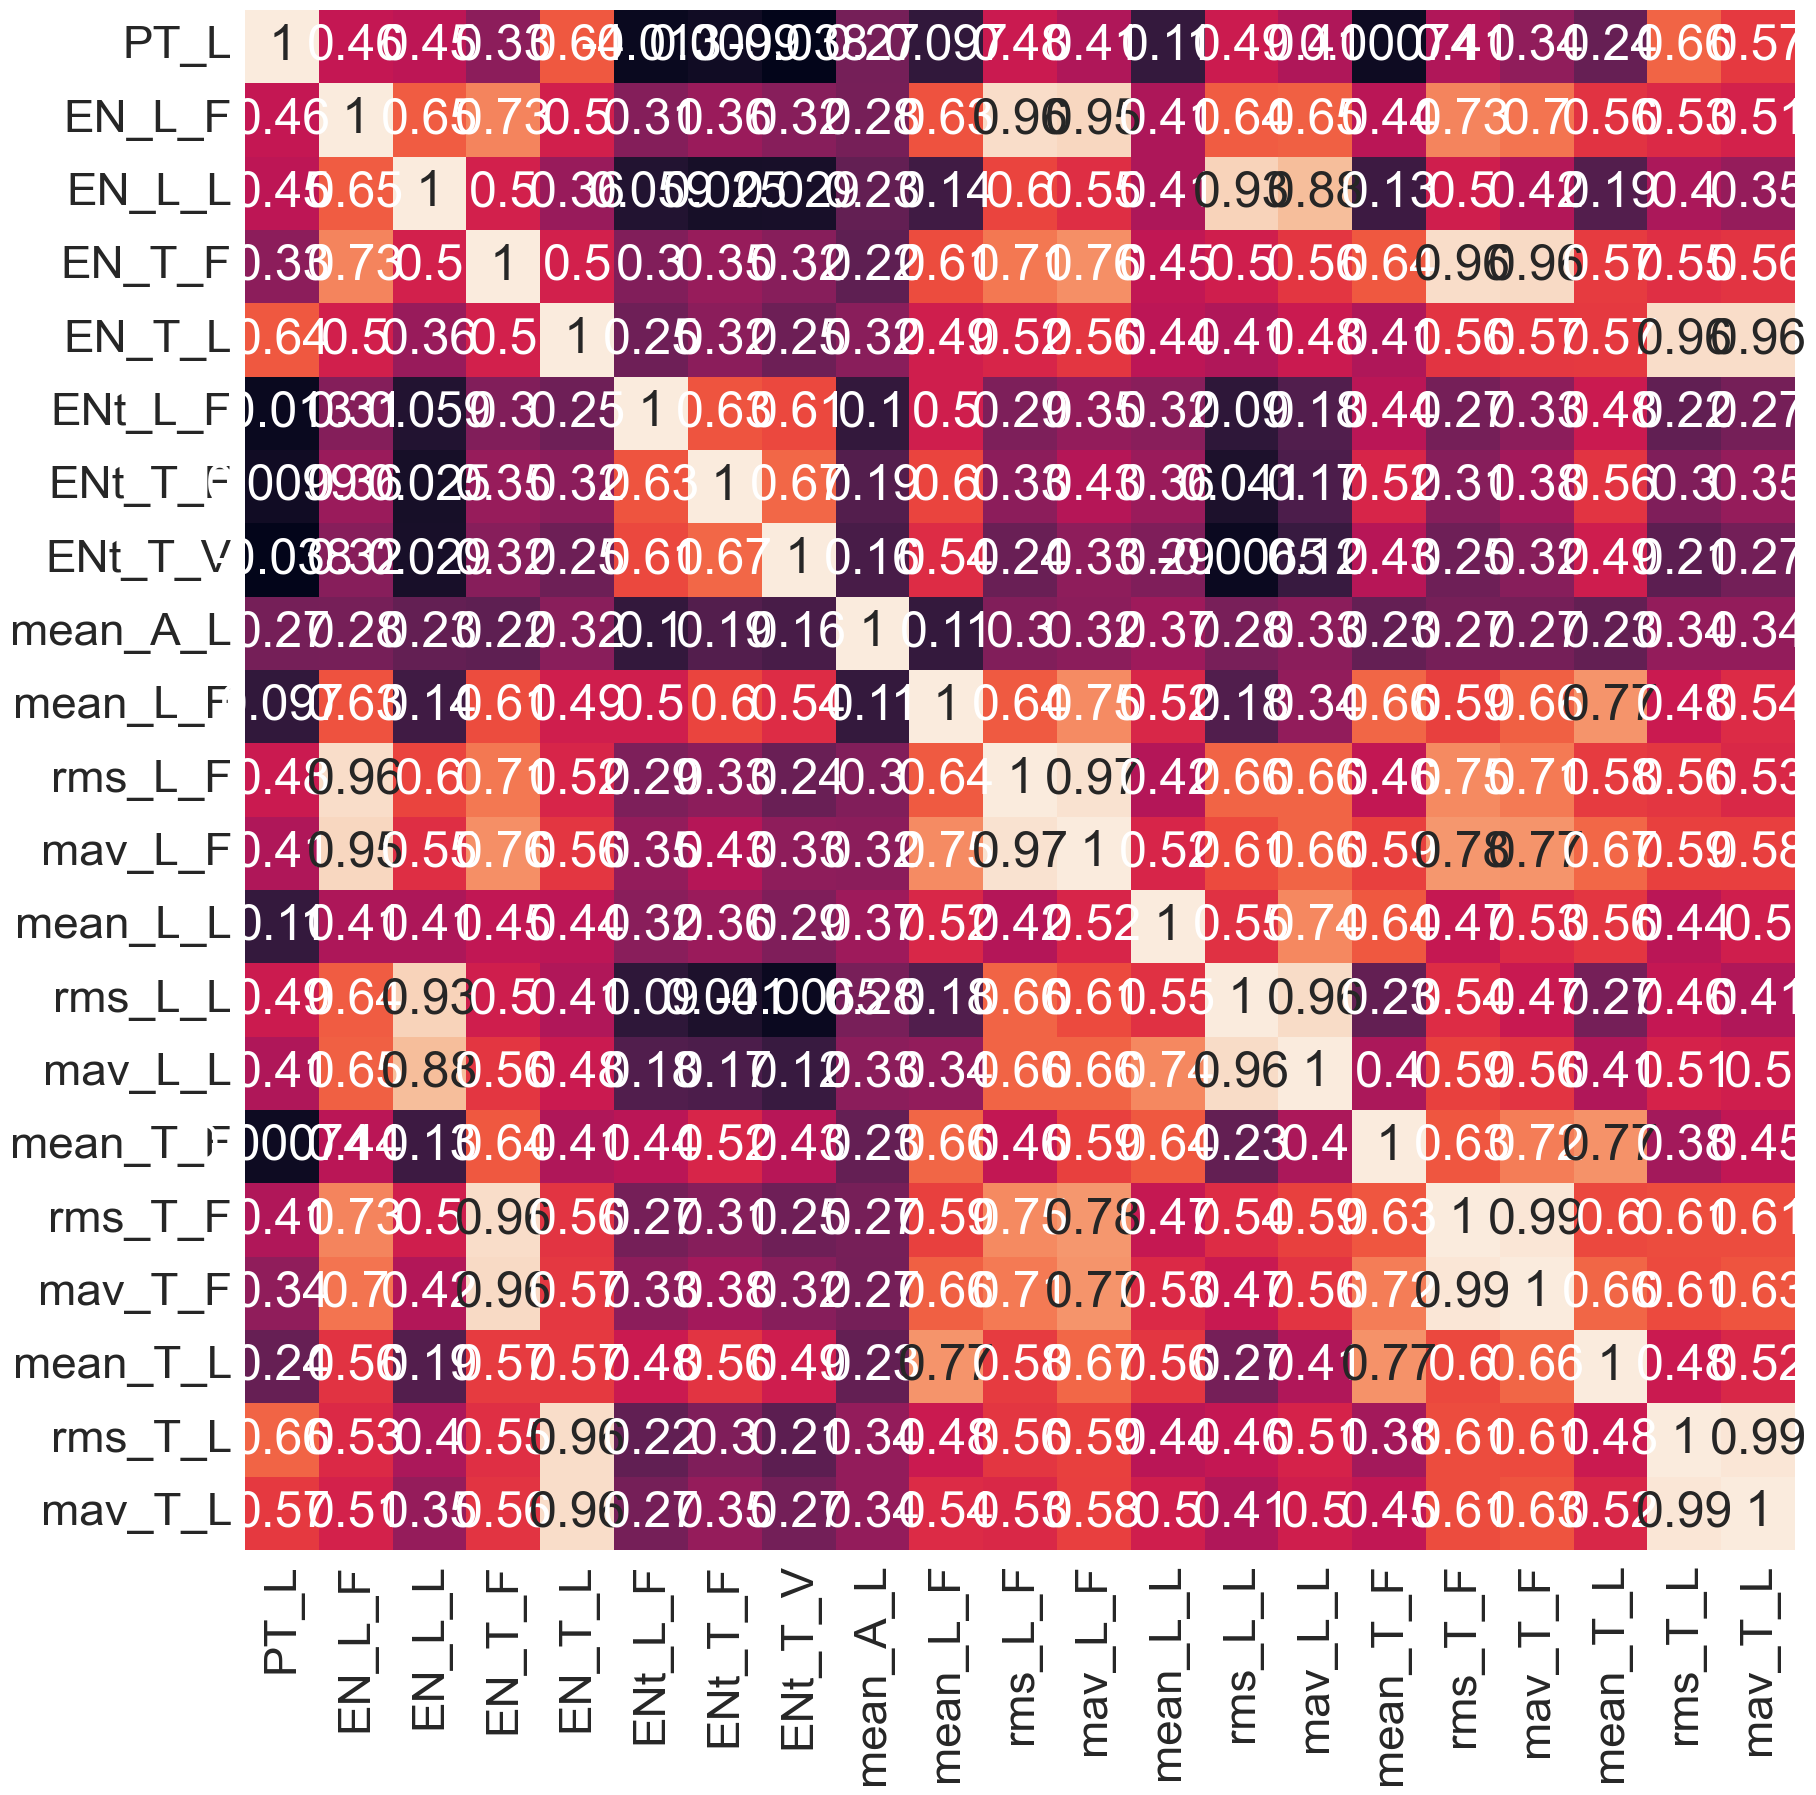

In [30]:
df_corr=df.corr()
matrix=df_corr.to_numpy()
target_row = matrix[-1, :]
indices_above_threshold = np.where(target_row >= 0.25)[0]

column_names = df.columns.tolist()
list0 = df.columns[indices_above_threshold].tolist()
df_total =df[list0]

#상관 관계 행렬
df_corr=df_total.corr()

#히트맵
plt.figure(figsize=(20,20))
sns.set(font_scale=3)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()
sns.set(font_scale=1)

In [31]:
df_total.columns

Index(['PT_L', 'EN_L_F', 'EN_L_L', 'EN_T_F', 'EN_T_L', 'ENt_L_F', 'ENt_T_F',
       'ENt_T_V', 'mean_A_L', 'mean_L_F', 'rms_L_F', 'mav_L_F', 'mean_L_L',
       'rms_L_L', 'mav_L_L', 'mean_T_F', 'rms_T_F', 'mav_T_F', 'mean_T_L',
       'rms_T_L', 'mav_T_L'],
      dtype='object')

In [32]:
df_e = df[['PT_L', 'EN_L_F', 'EN_L_L', 'EN_T_F', 'EN_T_L', 'ENt_L_F', 'ENt_T_F',
       'ENt_T_V', 'mean_A_L', 'mean_L_F', 'rms_L_F', 'mav_L_F', 'mean_L_L',
       'rms_L_L', 'mav_L_L', 'mean_T_F', 'rms_T_F', 'mav_T_F', 'mean_T_L',
       'rms_T_L', 'mav_T_L', 'Action']]

In [33]:
df_e['Action'].value_counts()

Action
1    1617
0    1617
Name: count, dtype: int64

In [34]:
df_e.dropna(inplace=True)
df_e['Action'].value_counts()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_11440\1254545564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e.dropna(inplace=True)


Action
1    1617
0    1617
Name: count, dtype: int64

In [35]:
y = df_e['Action']
X = df_e.drop(columns=['Action'], axis=1)

In [36]:
X

,PT_L,EN_L_F,EN_L_L,EN_T_F,EN_T_L,ENt_L_F,ENt_T_F,ENt_T_V,mean_A_L,mean_L_F,...,mav_L_F,mean_L_L,rms_L_L,mav_L_L,mean_T_F,rms_T_F,mav_T_F,mean_T_L,rms_T_L,mav_T_L
15630,862021.247159,25932385,5515632,2802111,2144169,2.424056,2.304265,2.097525,337.578125,118.890625,...,482.359375,231.000000,293.567284,267.500000,-43.609375,209.243840,165.765625,109.609375,183.037266,158.578125
15631,531140.572071,21364797,13708873,3975320,3018962,2.662316,2.643889,2.426160,457.531250,110.578125,...,445.171875,332.859375,462.818691,401.796875,-113.781250,249.227557,212.781250,136.125000,217.189505,177.593750
15632,364130.292911,28800887,10034298,6590341,1467429,2.457412,2.126699,2.309814,349.390625,115.359375,...,534.328125,240.156250,395.962001,321.343750,-63.390625,320.895743,255.890625,5.390625,151.421855,117.203125
15633,551938.269099,13983758,10704520,11475592,2210700,2.266416,1.905103,2.226907,385.875000,105.781250,...,374.562500,279.125000,408.972034,347.718750,-64.718750,423.445540,318.250000,23.562500,185.855286,136.343750
15634,597786.560528,22652101,7974633,3790552,2114052,2.483031,2.101970,2.344183,345.765625,44.453125,...,467.390625,214.984375,352.992409,298.796875,-101.906250,243.366750,195.531250,23.000000,181.747249,125.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,296893.982806,23107779,2183165,2086765,1909480,2.313149,2.274841,1.894319,-15.625000,81.296875,...,420.296875,85.890625,184.694215,141.609375,-69.796875,180.570494,130.078125,-141.437500,172.729919,142.906250
1613,324795.403114,22855747,3051651,1618682,1876564,2.114588,2.038126,2.293463,30.703125,97.546875,...,443.453125,113.515625,218.362192,178.046875,-53.406250,159.034293,127.031250,-130.906250,171.234671,133.593750
1614,245656.814860,22114785,2866905,1491858,1398742,2.396386,2.138490,1.853788,-54.609375,98.203125,...,426.140625,88.515625,211.649216,165.109375,-52.343750,152.677049,110.500000,-120.343750,147.835529,122.125000
1615,352849.782766,17994436,2412936,1429639,1869362,2.292886,2.189699,2.189998,25.406250,87.218750,...,364.875000,92.000000,194.170350,150.843750,-61.015625,149.459390,117.359375,-138.906250,170.905767,139.500000


In [37]:
y

15630    1
15631    1
15632    1
15633    1
15634    1
        ..
1612     0
1613     0
1614     0
1615     0
1616     0
Name: Action, Length: 3234, dtype: int64

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1617, 21), (1617, 21), (1617,), (1617,))

In [85]:
'''

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, LayerNormalization, MultiHeadAttention, Concatenate, Lambda
from tensorflow.keras.models import Model
import numpy as np

# Reparameterization Trick
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Conditional Variational Autoencoder (CVAE)
class ConditionalVAE(Model):
    def __init__(self, input_dim, latent_dim, condition_dim):
        super(ConditionalVAE, self).__init__()
        self.latent_dim = latent_dim
        self.condition_dim = condition_dim

        # Encoder
        self.encoder_inputs = Input(shape=(input_dim,), name="encoder_input")
        self.condition_input = Input(shape=(condition_dim,), name="condition_input")

        x = Dense(64, activation="relu")(self.encoder_inputs)
        x = Dense(128, activation="relu")(x)
        x = Concatenate()([x, self.condition_input])  # Condition 추가
        x = Dense(128, activation="relu")(x)

        self.z_mean = Dense(latent_dim, name="z_mean")(x)
        self.z_log_var = Dense(latent_dim, name="z_log_var")(x)
        self.z = Lambda(sampling, name="z_sampling")([self.z_mean, self.z_log_var])

        # Decoder
        self.decoder_inputs = Input(shape=(latent_dim + condition_dim,), name="decoder_input")
        x = Dense(128, activation="relu")(self.decoder_inputs)
        x = Dense(128, activation="relu")(x)
        x = Dense(input_dim, activation="sigmoid")(x)  # 원본 차원(21)으로 복원

        # Transformer Encoder
        self.transformer_encoder = MultiHeadAttention(num_heads=2, key_dim=latent_dim)
        self.norm1 = LayerNormalization(epsilon=1e-6)

        # Transformer Decoder
        self.transformer_decoder = MultiHeadAttention(num_heads=2, key_dim=latent_dim)
        self.norm2 = LayerNormalization(epsilon=1e-6)

        # Compile Encoder and Decoder Models
        self.encoder = Model([self.encoder_inputs, self.condition_input], [self.z_mean, self.z_log_var, self.z], name="encoder")
        self.decoder = Model(self.decoder_inputs, x, name="decoder")

    def call(self, inputs):
        x, condition = inputs
        z_mean, z_log_var, z = self.encoder([x, condition])

        # Transformer Input Shape 맞추기
        z = tf.expand_dims(z, axis=1)  # (None, 1, latent_dim)
        z = self.transformer_encoder(z, z)
        z = self.norm1(z)
        z = tf.squeeze(z, axis=1)  # 다시 (None, latent_dim)으로 변환

        # Condition 추가
        z_cond = Concatenate()([z, condition])

        # Transformer Decoder
        z_cond = tf.expand_dims(z_cond, axis=1)
        decoded = self.transformer_decoder(z_cond, z_cond)
        decoded = self.norm2(decoded)
        decoded = tf.squeeze(decoded, axis=1)

        # Decode from Latent Space
        reconstructed = self.decoder(decoded)
        return reconstructed, z_mean, z_log_var

# Hyperparameters
input_dim = 21  # 변경된 입력 차원 (21차원)
latent_dim = 16
condition_dim = 5  # Condition 벡터 차원

# Create Model
cvae = ConditionalVAE(input_dim, latent_dim, condition_dim)

# Compile Model
cvae.compile(optimizer="adam", loss="mse")

# Print Summary
cvae.encoder.summary()
cvae.decoder.summary()


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)    │ (None, 21)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_24 (Dense)              │ (None, 64)                │           1,408 │ encoder_input[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_25 (Dense)              │ (None, 128)               │           8,320 │ dense_24[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ condition_input (InputLayer)  │ (None, 5)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_13 (Concatenate)  │ (None, 133)               │               0 │ dense_25[0][0],            │
│                               │                           │                 │ condition_input[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_26 (Dense)              │ (None, 128)               │          17,152 │ concatenate_13[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ z_mean (Dense)                │ (None, 16)                │           2,064 │ dense_26[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ z_log_var (Dense)             │ (None, 16)                │           2,064 │ dense_26[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ z_sampling (Lambda)           │ (None, 16)                │               0 │ z_mean[0][0],              │
│                               │                           │                 │ z_log_var[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 31,008 (121.12 KB)

 Trainable params: 31,008 (121.12 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)           │ (None, 21)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 21)                  │           2,709 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,037 (86.08 KB)

 Trainable params: 22,037 (86.08 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Conv1DTranspose, Flatten, Dense, Lambda, Reshape, Concatenate, MultiHeadAttention, LayerNormalization
from tensorflow.keras.models import Model
import numpy as np

# Reparameterization Trick
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Conditional Variational Autoencoder (CVAE)
class ConditionalVAE(Model):
    def __init__(self, input_dim, latent_dim, condition_dim):
        super(ConditionalVAE, self).__init__()
        self.latent_dim = latent_dim
        self.condition_dim = condition_dim

        # Encoder
        self.encoder_inputs = Input(shape=(input_dim, 1), name="encoder_input")  # 1D 입력 추가
        self.condition_input = Input(shape=(condition_dim,), name="condition_input")

        x = Conv1D(32, kernel_size=3, activation="relu", padding="same")(self.encoder_inputs)
        x = Conv1D(64, kernel_size=3, activation="relu", padding="same")(x)
        x = Flatten()(x)
        x = Concatenate()([x, self.condition_input])  # Condition 추가
        x = Dense(128, activation="relu")(x)

        self.z_mean = Dense(latent_dim, name="z_mean")(x)
        self.z_log_var = Dense(latent_dim, name="z_log_var")(x)
        self.z = Lambda(sampling, name="z_sampling")([self.z_mean, self.z_log_var])

        # Decoder
        self.decoder_inputs = Input(shape=(latent_dim + condition_dim,), name="decoder_input")
        x = Dense(128, activation="relu")(self.decoder_inputs)
        x = Dense(input_dim * 32, activation="relu")(x)  # CNN 입력을 위해 Reshape 크기 조정
        x = Reshape((input_dim, 32))(x)

        x = Conv1DTranspose(64, kernel_size=3, activation="relu", padding="same")(x)
        x = Conv1DTranspose(32, kernel_size=3, activation="relu", padding="same")(x)
        x = Conv1DTranspose(1, kernel_size=3, activation="sigmoid", padding="same")(x)  # 원본 크기 복원

        # Transformer Encoder
        self.transformer_encoder = MultiHeadAttention(num_heads=2, key_dim=latent_dim)
        self.norm1 = LayerNormalization(epsilon=1e-6)

        # Transformer Decoder
        self.transformer_decoder = MultiHeadAttention(num_heads=2, key_dim=latent_dim)
        self.norm2 = LayerNormalization(epsilon=1e-6)

        # Compile Encoder and Decoder Models
        self.encoder = Model([self.encoder_inputs, self.condition_input], [self.z_mean, self.z_log_var, self.z], name="encoder")
        self.decoder = Model(self.decoder_inputs, x, name="decoder")

    def call(self, inputs):
        x, condition = inputs
        z_mean, z_log_var, z = self.encoder([x, condition])

        # Transformer Input Shape 맞추기
        z = tf.expand_dims(z, axis=1)  # (None, 1, latent_dim)
        z = self.transformer_encoder(z, z)
        z = self.norm1(z)
        z = tf.squeeze(z, axis=1)  # 다시 (None, latent_dim)으로 변환

        # Condition 추가
        z_cond = Concatenate()([z, condition])

        # Transformer Decoder
        z_cond = tf.expand_dims(z_cond, axis=1)
        decoded = self.transformer_decoder(z_cond, z_cond)
        decoded = self.norm2(decoded)
        decoded = tf.squeeze(decoded, axis=1)

        # Decode from Latent Space
        reconstructed = self.decoder(decoded)
        return reconstructed, z_mean, z_log_var

# Hyperparameters
input_dim = 100  # 시계열 길이 (예: 100 타임스텝)
latent_dim = 16
condition_dim = 5  # Condition 차원

# Create Model
cvae = ConditionalVAE(input_dim, latent_dim, condition_dim)

# Compile Model
cvae.compile(optimizer="adam", loss="mse")

# Print Summary
cvae.encoder.summary()
cvae.decoder.summary()


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)    │ (None, 100, 1)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_9 (Conv1D)             │ (None, 100, 32)           │             128 │ encoder_input[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_10 (Conv1D)            │ (None, 100, 64)           │           6,208 │ conv1d_9[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_4 (Flatten)           │ (None, 6400)              │               0 │ conv1d_10[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ condition_input (InputLayer)  │ (None, 5)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_22 (Concatenate)  │ (None, 6405)              │               0 │ flatten_4[0][0],           │
│                               │                           │                 │ condition_input[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_30 (Dense)              │ (None, 128)               │         819,968 │ concatenate_22[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ z_mean (Dense)                │ (None, 16)                │           2,064 │ dense_30[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ z_log_var (Dense)             │ (None, 16)                │           2,064 │ dense_30[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ z_sampling (Lambda)           │ (None, 16)                │               0 │ z_mean[0][0],              │
│                               │                           │                 │ z_log_var[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 830,432 (3.17 MB)

 Trainable params: 830,432 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)           │ (None, 21)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 3200)                │         412,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_4 (Reshape)                  │ (None, 100, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_transpose_3 (Conv1DTranspose) │ (None, 100, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_transpose_4 (Conv1DTranspose) │ (None, 100, 32)             │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_transpose_5 (Conv1DTranspose) │ (None, 100, 1)              │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 428,097 (1.63 MB)

 Trainable params: 428,097 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

In [101]:
import numpy as np

# ---------------------------------------------
# 데이터 필터링 (y == 0 인 데이터만 선택)
# ---------------------------------------------
def filter_data(X, y):
    mask = (y == 0)  # 레이블이 0인 데이터 선택
    return X[mask], y[mask]

# y == 0인 데이터만 필터링
X_train_filtered, y_train_filtered = filter_data(X_train, y_train)
X_test_filtered, y_test_filtered = filter_data(X_test, y_test)


In [102]:
X_train_filtered.shape, y_train_filtered.shape, X_test_filtered.shape, y_test_filtered.shape

((828, 21), (828,), (789, 21), (789,))

In [103]:
# 모델 학습
history = cvae.fit([X_train_filtered, condition_train], X_train_filtered,
         epochs=50, batch_size=16,  validation_split = 0.1)


Epoch 1/50


C:\Users\SUHlab\anaconda3\Lib\site-packages\keras\src\layers\layer.py:1383: UserWarning: Layer 'conditional_vae_8' looks like it has unbuilt state, but Keras is not able to trace the layer `call()` in order to build it automatically. Possible causes:
1. The `call()` method of your layer may be crashing. Try to `__call__()` the layer eagerly on some test input first to see if it works. E.g. `x = np.random.random((3, 4)); y = layer(x)`
2. If the `call()` method is correct, then you may need to implement the `def build(self, input_shape)` method on your layer. It should create all variables used by the layer (e.g. by calling `layer.build()` on all its children layers).
Exception encountered: ''Input 0 of layer "encoder" is incompatible with the layer: expected shape=(None, 100, 1), found shape=(None, 21)''
  warnings.warn(
C:\Users\SUHlab\anaconda3\Lib\site-packages\keras\src\layers\layer.py:391: UserWarning: `build()` was called on layer 'conditional_vae_8', however the layer does not ha

ValueError: Exception encountered when calling ConditionalVAE.call().

[1mInput 0 of layer "encoder" is incompatible with the layer: expected shape=(None, 100, 1), found shape=(None, 21)[0m

Arguments received by ConditionalVAE.call():
  • inputs=('tf.Tensor(shape=(None, 21), dtype=float32)', 'tf.Tensor(shape=(None, 5), dtype=float32)')

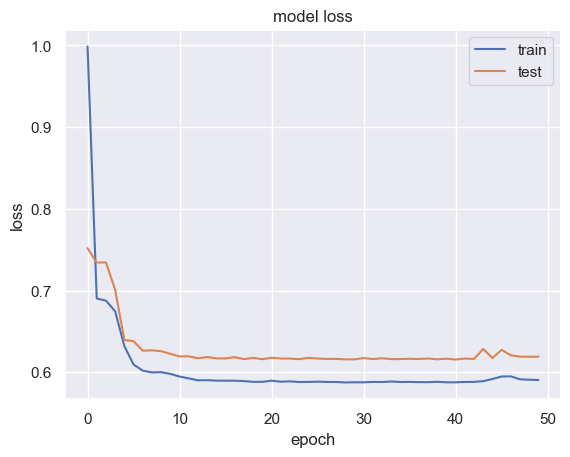

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [97]:
import numpy as np

# ---------------------------------------------
# 재구성 오차 기반 이상 탐지
# ---------------------------------------------
def compute_reconstruction_error(model, X, condition):
    reconstructed, _, _ = model([X, condition])  # 모델을 통해 데이터 복원
    mse = np.mean(np.square(X - reconstructed), axis=1)  # MSE 계산 (각 샘플별)
    return mse

# 정상 데이터에 대한 재구성 오차 계산 (훈련 데이터 기준)
train_errors = compute_reconstruction_error(cvae, X_train_filtered, condition_train)

# 테스트 데이터에 대한 재구성 오차 계산
test_errors = compute_reconstruction_error(cvae, X_test_filtered, condition_test)

# ---------------------------------------------
# 이상 탐지 기준 설정 (95th percentile 기준)
# ---------------------------------------------
threshold = np.percentile(train_errors, 95)  # 훈련 데이터의 95%를 커버하는 임계값 설정

# 이상 감지 (임계값 초과 여부)
anomalies = test_errors > threshold

# ---------------------------------------------
# 결과 출력
# ---------------------------------------------
print(f"Reconstruction Error Threshold: {threshold:.5f}")
print(f"Detected {np.sum(anomalies)} anomalies out of {len(test_errors)} test samples.")

# 정상(0) 및 비정상(1) 분류 결과 생성
predicted_labels = np.where(anomalies, 1, 0)  # 비정상 = 1, 정상 = 0

# 원래 테스트 라벨과 비교
if 'y_test_filtered' in locals():
    actual_labels = y_test_filtered  # 실제 라벨
    accuracy = np.mean(predicted_labels == actual_labels)
    print(f"Accuracy of Anomaly Detection: {accuracy:.2%}")

# ---------------------------------------------
# 분류된 결과 출력 (정상/비정상)
# ---------------------------------------------
import pandas as pd

df_results = pd.DataFrame({
    "Test Sample Index": np.arange(len(test_errors)),
    "Reconstruction Error": test_errors,
    "Predicted Label (0=Normal, 1=Anomaly)": predicted_labels
})



Reconstruction Error Threshold: 1.18381
Detected 50 anomalies out of 789 test samples.
Accuracy of Anomaly Detection: 93.66%
